<a href="https://colab.research.google.com/github/agauravkishore/Instacart-Market-Basket-Analysis/blob/master/Instacart_market_basket_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import precision_score

import os
os.getcwd()

'/content/drive/Shared drives/ML with Python - Project'

In [0]:
#Mounting Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#Changing directory to the shared drive
os.chdir('/content/drive/Shared drives/ML with Python - Project')

In [0]:
import io
orders = pd.read_csv(r'orders.csv') #Null values in days_since_prior_order
products = pd.read_csv(r'products.csv')
aisles = pd.read_csv(r'aisles.csv')
departments = pd.read_csv(r'departments.csv')
order_products_prior = pd.read_csv(r'order_products__prior.csv')
sample_submission = pd.read_csv(r'sample_submission.csv')
order_products_train = pd.read_csv(r'order_products__train.csv')



In [0]:
departments.head(5)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [0]:
order_products_prior.head(5)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [0]:
aisles.head(5)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [0]:
products.head(5)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [0]:
order_products_train.head(5)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [0]:
orders.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


## Data cleaning

In [0]:
# Get the statistics of your dataframe
departments.describe()
products.describe()
order_products_prior.describe()
aisles.describe()
orders.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
mean,1.710542e+06,1.029782e+05,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01
std,9.875817e+05,5.953372e+04,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.552715e+05,5.139400e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.710542e+06,1.026890e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.565812e+06,1.543850e+05,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


In [0]:
missing = orders.isnull().sum()
Percent_missing = (missing/len(orders))*100
Percent_missing

order_id                  0.000000
user_id                   0.000000
eval_set                  0.000000
order_number              0.000000
order_dow                 0.000000
order_hour_of_day         0.000000
days_since_prior_order    6.027594
dtype: float64

From above we observed that, only 6% of days_since_prior_order column is null. So we decided to truncate them

In [0]:
orders=orders[orders['days_since_prior_order'].notnull()]
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0


In [0]:
#checking missing value for departments
departments.isnull().any()
#no missisng value

department_id    False
department       False
dtype: bool

In [0]:
#checking missing value for aisles
aisles.isnull().any()
#no missisng value

aisle_id    False
aisle       False
dtype: bool

In [0]:
#checking missing value for products
products.isnull().any()
#no missisng value

product_id       False
product_name     False
aisle_id         False
department_id    False
dtype: bool

In [0]:
#checking missing value for order_products_prior
order_products_prior.isnull().any()
#no missisng value

order_id             False
product_id           False
add_to_cart_order    False
reordered            False
dtype: bool

In [0]:
#checking missing value for order_products_prior
order_products_train.isnull().any()
#no missisng value

order_id             False
product_id           False
add_to_cart_order    False
reordered            False
dtype: bool

There aren't any missing value except for orders data which we have handled.

# DATA VISUALIZATION AND EXPLORARTORY DATA ANALYSIS

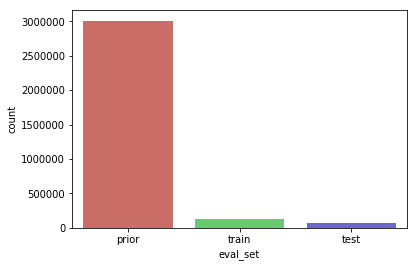

In [0]:
sns.countplot(x='eval_set', data=orders, palette='hls')

In [0]:
orders['eval_set'].value_counts()
#From the above graph we can see that that test evaluation as 75000 samples on which we will obtain predictions

prior    3008665
train     131209
test       75000
Name: eval_set, dtype: int64

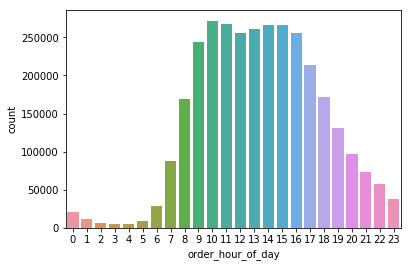

In [0]:
#distribution with respect to the hour of the day
ax = sns.countplot(x="order_hour_of_day", data=orders)

In [0]:
orders['order_hour_of_day'].value_counts()

10    271768
11    267812
15    266375
14    266007
13    261087
12    255846
16    255459
9     243452
17    214208
18    171133
8     168744
19    131383
20     97619
7      87227
21     73471
22     57605
23     37507
6      28956
0      21265
1      11636
5       9023
2       7010
4       5164
3       5117
Name: order_hour_of_day, dtype: int64

From graph and value above, we observe that the maximum number of orders is around 10 AM and 11AM followed by 3-4PM. The reason  behind it that these are peak hours for the order as people are active during this time. Meanwhile orders are least at 3-4AM sas it's late night sleeping time.

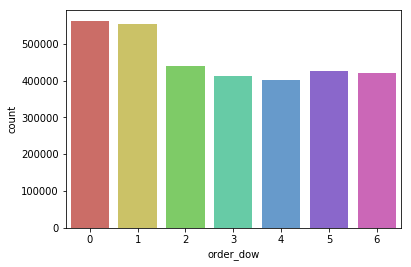

In [0]:
sns.countplot(x="order_dow", data=orders,palette='hls')

In [0]:
orders['order_dow'].value_counts()

0    562388
1    552505
2    439399
5    427295
6    420070
3    411314
4    401903
Name: order_dow, dtype: int64

From the graph and value above, we observed that order number is maximum on Sunday and Monday. This is mainly because people prefer shopping for groceries either at the start of the week or in the weekend. Meanwhile,it's least in the middle of the week which is thursday followed by wednesday.


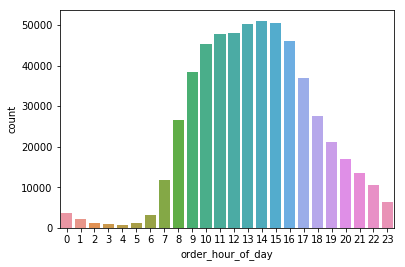

In [0]:
#plot of order for sunday
sns.countplot(x='order_hour_of_day',data=orders[orders['order_dow']==0])

 We observe that  maximum number of orders are placed around 2-3pm.

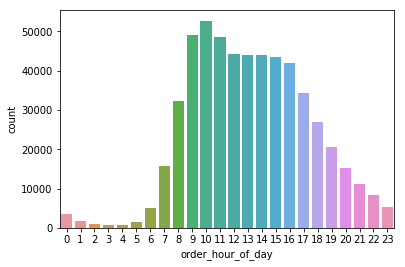

In [0]:
sns.countplot(x='order_hour_of_day',data=orders[orders['order_dow']==1])

The peak is reached at 10AM. So most of the orders are placed in the morning on Monday from 9-11AM. Followed by 12-3pm.

---



Next we get the orders in terms of hour of the day and day of the week in a single dataset by using the groupby option for better visualization

In [0]:

orders_group = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()

orders_group.head(), orders_group.tail()

(   order_dow  order_hour_of_day  order_number
 0          0                  0          3690
 1          0                  1          2245
 2          0                  2          1296
 3          0                  3           902
 4          0                  4           756,
      order_dow  order_hour_of_day  order_number
 163          6                 19         17128
 164          6                 20         12486
 165          6                 21          9842
 166          6                 22          7973
 167          6                 23          5710)

In [0]:
#pivot table 
orders_group = orders_group.pivot(index = 'order_dow', columns = 'order_hour_of_day', values = 'order_number')
orders_group

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,,,,
0,3690,2245,1296,902,756,1093,3143,11762,26514,38363,45398,47806,48035,50372,51038,50427,46136,37056,27588,21126,17062,13577,10543,6460
1,3429,1723,1020,696,756,1523,5078,15725,32382,49136,52679,48611,44126,43894,43986,43590,41930,34407,27046,20687,15223,11196,8417,5245
2,2843,1472,878,683,696,1317,4511,12606,23343,34351,36997,35784,33626,34455,34946,35249,35239,30092,24797,18794,14045,10032,7649,4994
3,2760,1398,893,608,676,1279,4345,11775,21338,30578,34032,33203,31456,32141,32665,33878,33156,28483,23399,17991,12977,9681,7735,4867
4,2476,1415,841,644,695,1253,4184,11893,20682,29670,33070,31969,30337,30924,31696,32244,32034,27697,22935,18140,13326,10198,8275,5305
5,2987,1568,952,780,846,1502,4632,12770,22789,32342,36195,35816,33593,34185,35351,35379,33770,28131,22806,17517,12500,8945,7013,4926
6,3080,1815,1130,804,739,1056,3063,10696,21696,29012,33397,34623,34673,35116,36325,35608,33194,28342,22562,17128,12486,9842,7973,5710


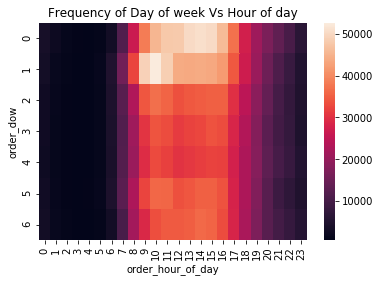

In [0]:
sns.heatmap(orders_group)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

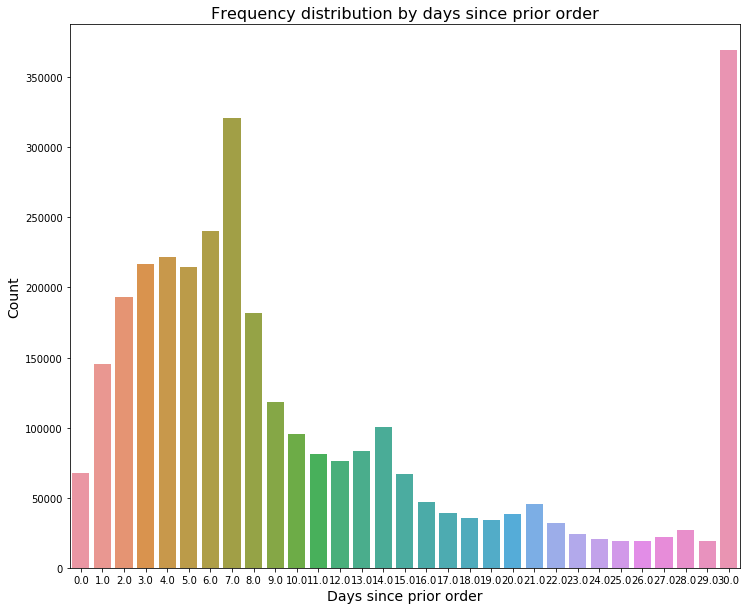

In [0]:
plt.figure(figsize=(12,10))
sns.countplot(x="days_since_prior_order", data=orders)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Days since prior order', fontsize=14)
plt.title("Frequency distribution by days since prior order", fontsize=16)
plt.show()

We observe that 7th day  we have a spike followed  by a small peak at days. Then there is spike on 14,21 and 28 days. This indicates that every 7 days or weekly is the order frequency. Also,there's a huge peak at the end of the month showing there's a monthly peak.

In [0]:
# percentage of re-orders in orders_products_prior
order_products_prior.reordered.sum() / len(order_products_prior)

0.5896974667922161

59% of the products are re-ordered from the prior dataset

In [0]:
# percentage of re-orders in orders_products_train
order_products_train.reordered.sum() / len(order_products_train)

0.5985944127509629


60% of the products are re-ordered from the train dataset

In [0]:
#merging order_products_prior and products
op_prior_merged = pd.merge(order_products_prior, products, on='product_id', how='left')


In [0]:
#merging op_merged with aisles
op_prior_merged = pd.merge(op_prior_merged, aisles, on='aisle_id', how='left')

In [0]:

#merging the new op_prior_merged with departments
op_prior_merged= pd.merge(op_prior_merged, departments, on='department_id', how='left')
op_prior_merged.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department_x,department_y
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,pantry


In [0]:
count_products = op_prior_merged['product_name'].value_counts().reset_index().head(20)
count_products.columns=['product_name','frequency']
count_products.head()

,product_name,frequency
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584


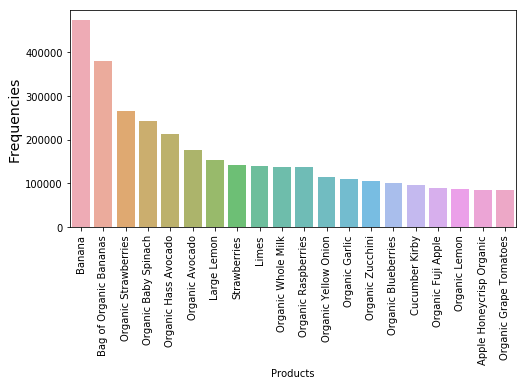

In [0]:
plt.figure(figsize=(8,4))
sns.barplot(count_products.product_name, count_products.frequency, alpha=0.8)
plt.ylabel('Frequencies', fontsize=14)
plt.xlabel('Products', fontsize=10)
plt.xticks(rotation='vertical')
plt.show()

The most ordered products are fruits like bananas, strawberries and organic products.

In [0]:
count_aisles = op_prior_merged['aisle'].value_counts().head(20)
count_aisles

fresh fruits                     3642188
fresh vegetables                 3418021
packaged vegetables fruits       1765313
yogurt                           1452343
packaged cheese                   979763
milk                              891015
water seltzer sparkling water     841533
chips pretzels                    722470
soy lactosefree                   638253
bread                             584834
refrigerated                      575881
frozen produce                    522654
ice cream ice                     498425
crackers                          458838
energy granola bars               456386
eggs                              452134
lunch meat                        395130
frozen meals                      390299
baby food formula                 382456
fresh herbs                       377741
Name: aisle, dtype: int64

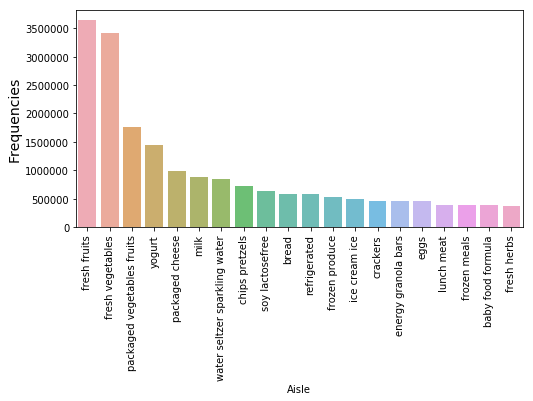

In [0]:
plt.figure(figsize=(8,4))
sns.barplot(count_aisles.index, count_aisles.values, alpha=0.8)
plt.ylabel('Frequencies', fontsize=14)
plt.xlabel('Aisle', fontsize=10)
plt.xticks(rotation='vertical')
plt.show()

We can see that fresh food and vegetables aisles are most visited

In [0]:
#merge order_product_prior with orders 
merged_reorders = pd.merge(order_products_prior, orders, on='order_id', how='left')
merged_reorders.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279.0,prior,3.0,5.0,9.0,8.0
1,2,28985,2,1,202279.0,prior,3.0,5.0,9.0,8.0
2,2,9327,3,0,202279.0,prior,3.0,5.0,9.0,8.0
3,2,45918,4,1,202279.0,prior,3.0,5.0,9.0,8.0
4,2,30035,5,0,202279.0,prior,3.0,5.0,9.0,8.0


In [0]:
count_reordered = merged_reorders['reordered'].value_counts()
count_reordered

1    19126536
0    13307953
Name: reordered, dtype: int64

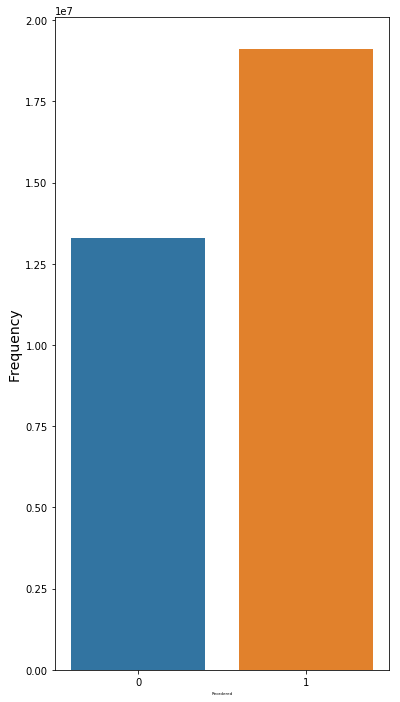

In [0]:
plt.figure(figsize=(6,12))
sns.barplot(count_reordered.index, count_reordered.values)
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Reordered', fontsize=4)
plt.show()

In [0]:
#finding reorders against day of the week
grouped_reorders_dow = merged_reorders.groupby(["order_dow"])["reordered"].aggregate("count").reset_index()
grouped_reorders_dow

,order_dow,reordered
0,0.0,5784174
1,1.0,5308998
2,2.0,3951279
3,3.0,3603910
4,4.0,3557740
5,5.0,3955823
6,6.0,4194497


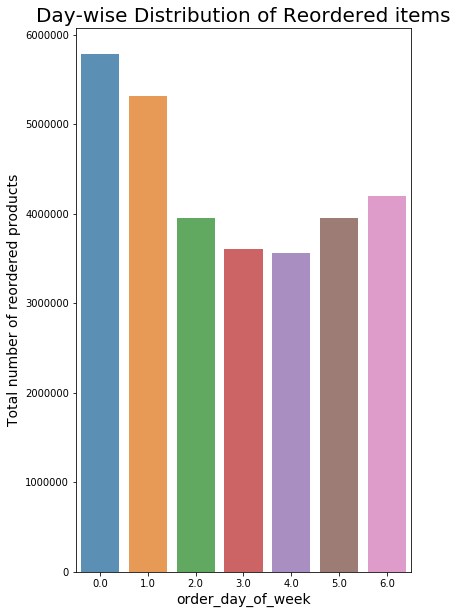

In [0]:
plt.figure(figsize=(6,10))
sns.barplot(grouped_reorders_dow.order_dow, grouped_reorders_dow.reordered, alpha=0.8)
plt.ylabel('Total number of reordered products', fontsize=14)
plt.xlabel('order_day_of_week', fontsize=14)
plt.title('Day-wise Distribution of Reordered items', fontsize=20)

plt.show()

Most products are reordered on Sunday followed by Monday and Saturday. Which follows the same trend as orders placed over the week.

In [0]:
#finding reorders against hour of the day
grouped_reorders_hod = merged_reorders.groupby(["order_hour_of_day"])["reordered"].aggregate("count").reset_index()
grouped_reorders_hod.head()

,order_hour_of_day,reordered
0,0.0,203624
1,1.0,108192
2,2.0,64016
3,3.0,47894
4,4.0,49441


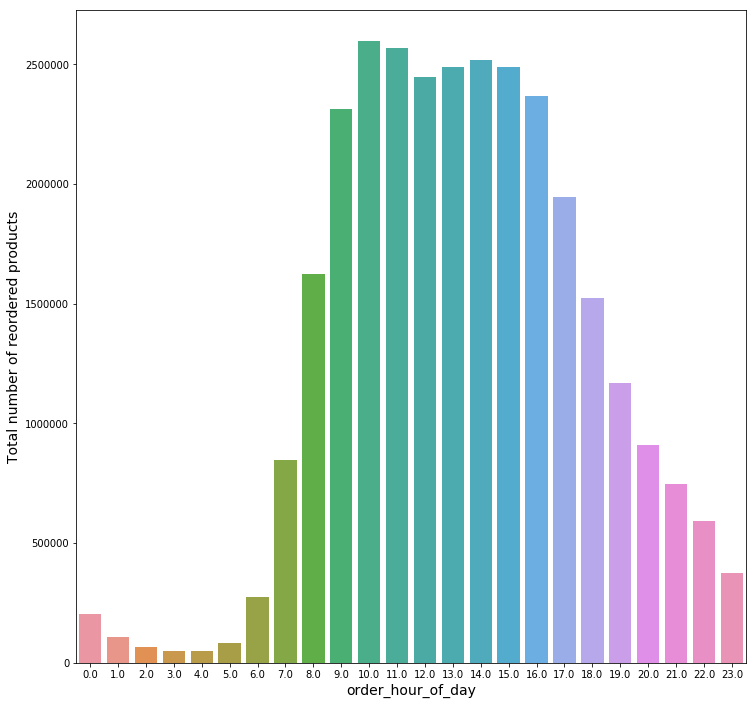

In [0]:
plt.figure(figsize=(12,12))
sns.barplot(grouped_reorders_hod.order_hour_of_day, grouped_reorders_hod.reordered)
plt.ylabel('Total number of reordered products', fontsize=14)
plt.xlabel('order_hour_of_day', fontsize=14)
plt.show()

Most of the products are reordered from 10-11AM followed by 1-3pm. This aligns with the number of products ordered during the week and the weekends.

correaltion for variable selection

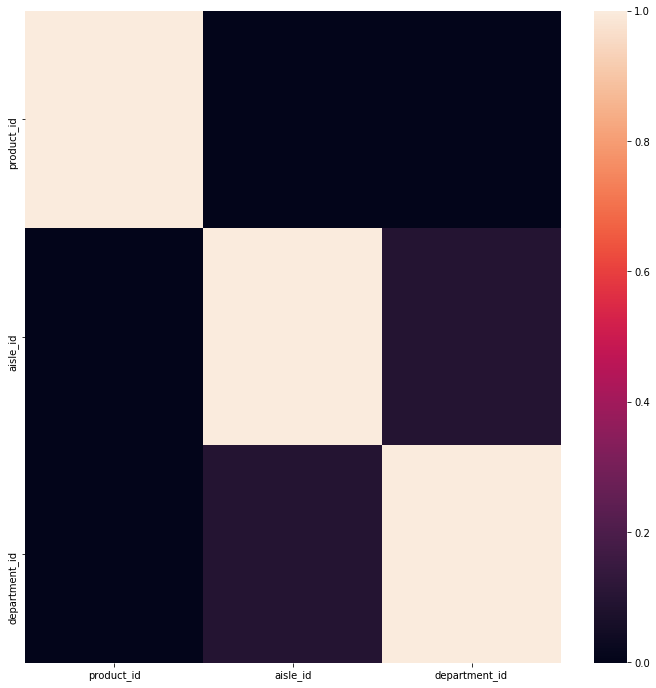

In [0]:
corr = products.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

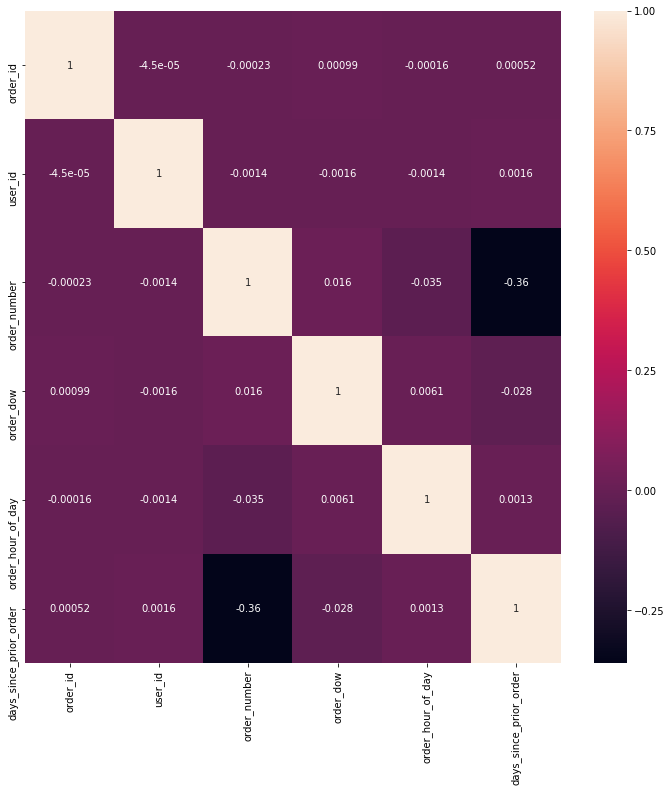

In [0]:
plt.figure(figsize=(12,12))
corr_orders = orders.corr()
sns.heatmap(corr_orders, 
            xticklabels=corr_orders.columns.values,
            yticklabels=corr_orders.columns.values,annot=True)

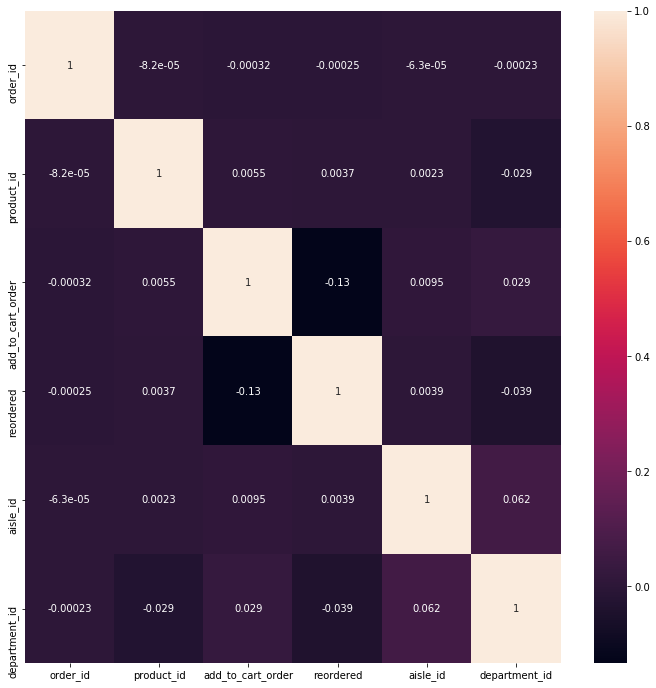

In [0]:
plt.figure(figsize=(12,12))
corr_op = op_prior_merged.corr()
sns.heatmap(corr_op, 
            xticklabels=corr_op.columns.values,
            yticklabels=corr_op.columns.values, annot=True)

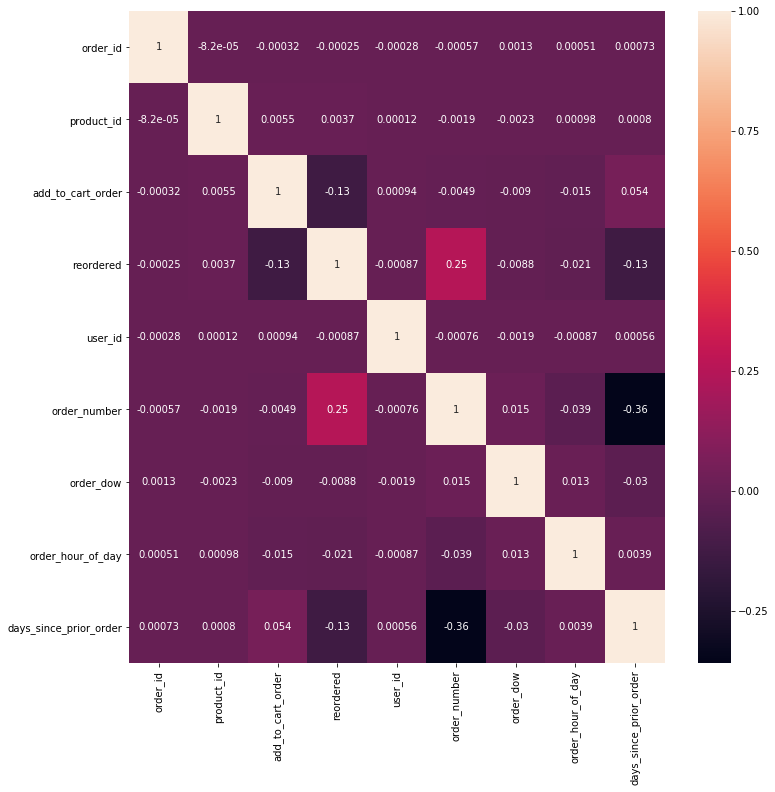

In [0]:
plt.figure(figsize=(12,12))
corr_reorders = merged_reorders.corr()
sns.heatmap(corr_reorders, 
            xticklabels=corr_reorders.columns.values,
            yticklabels=corr_reorders.columns.values, annot=True)

**MODEL BUILDING**

The features which would be used -

1) predict whether a product will be reordered or not : Order_id,Order_number,Average_days_between_orders,Nb_orders(Number of orders),Average_basket,Total items, Aisle,Department,Product,User_id,Order_hour_of_day,Order_dow(day of week),Days_since_prior_order,Days_since_ratio

2) Predict which department a product will belong to : Order_id,Order_number,Average_days_between_orders,Nb_orders(Number of orders),Average_basket,Orders,Reorders,Reordered rate,Total items,User_id,Order_hour_of_day,Order_dow(day of week),Days_since_prior_order,Days_since_ratio

In [0]:
merged1 = pd.merge(order_products_train, orders, on='order_id', how='left')
merged1.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,112108,train,4,4,10,9.0
1,1,11109,2,1,112108,train,4,4,10,9.0
2,1,10246,3,0,112108,train,4,4,10,9.0
3,1,49683,4,0,112108,train,4,4,10,9.0
4,1,43633,5,1,112108,train,4,4,10,9.0


In [0]:
df_merged1 = pd.merge(merged1, products, on='product_id', how='left')
df_merged1.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id
0,1,49302,1,1,112108,train,4,4,10,9.0,Bulgarian Yogurt,120,16
1,1,11109,2,1,112108,train,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16
2,1,10246,3,0,112108,train,4,4,10,9.0,Organic Celery Hearts,83,4
3,1,49683,4,0,112108,train,4,4,10,9.0,Cucumber Kirby,83,4
4,1,43633,5,1,112108,train,4,4,10,9.0,Lightly Smoked Sardines in Olive Oil,95,15


In [0]:
#Final data set is generated using all datasets
df = pd.merge(df_merged1, departments, on='department_id', how='left')
df.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department
0,1,49302,1,1,112108,train,4,4,10,9.0,Bulgarian Yogurt,120,16,dairy eggs
1,1,11109,2,1,112108,train,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,dairy eggs
2,1,10246,3,0,112108,train,4,4,10,9.0,Organic Celery Hearts,83,4,produce
3,1,49683,4,0,112108,train,4,4,10,9.0,Cucumber Kirby,83,4,produce
4,1,43633,5,1,112108,train,4,4,10,9.0,Lightly Smoked Sardines in Olive Oil,95,15,canned goods


In [0]:
df_new = df.copy()

In [0]:

del df['eval_set']

del df['add_to_cart_order']

In [0]:
df.head()

,order_id,product_id,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department
0,1,49302,1,112108,4,4,10,9.0,Bulgarian Yogurt,120,16,dairy eggs
1,1,11109,1,112108,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,dairy eggs
2,1,10246,0,112108,4,4,10,9.0,Organic Celery Hearts,83,4,produce
3,1,49683,0,112108,4,4,10,9.0,Cucumber Kirby,83,4,produce
4,1,43633,1,112108,4,4,10,9.0,Lightly Smoked Sardines in Olive Oil,95,15,canned goods


In [0]:
#Getting average days between orders as a feature by using days_since_prior_order
df['avg_days_btwn_orders'] = orders.groupby('user_id')['days_since_prior_order'].mean().astype(np.float32)
df['avg_days_btwn_orders'] = df['avg_days_btwn_orders'].replace(np.nan, 0)

In [0]:
df['avg_days_btwn_orders'] = df['avg_days_btwn_orders'].replace(0, 1)

In [0]:
#number of orders as a feature using the orders dataset
df['nb_orders'] = orders.groupby('user_id').size().astype(np.int16)
df['nb_orders'] = df['nb_orders'].replace(np.nan, 0)

In [0]:
df.head()

,order_id,product_id,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department,avg_days_btwn_orders,nb_orders
0,1,49302,1,112108,4,4,10,9.0,Bulgarian Yogurt,120,16,dairy eggs,1.000000,0.0
1,1,11109,1,112108,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,dairy eggs,19.000000,10.0
2,1,10246,0,112108,4,4,10,9.0,Organic Celery Hearts,83,4,produce,16.285715,14.0
3,1,49683,0,112108,4,4,10,9.0,Cucumber Kirby,83,4,produce,12.000000,12.0
4,1,43633,1,112108,4,4,10,9.0,Lightly Smoked Sardines in Olive Oil,95,15,canned goods,17.000000,5.0


In [0]:
#Getting the total items using the entire dataset 
df['total_items'] = df_merged1.groupby('user_id').size().astype(np.int16)
df['total_items'] = df['total_items'].replace(np.nan, 0)
df.head(5)

,order_id,product_id,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department,avg_days_btwn_orders,nb_orders,total_items
0,1,49302,1,112108,4,4,10,9.0,Bulgarian Yogurt,120,16,dairy eggs,1.000000,0.0,0.0
1,1,11109,1,112108,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,dairy eggs,19.000000,10.0,11.0
2,1,10246,0,112108,4,4,10,9.0,Organic Celery Hearts,83,4,produce,16.285715,14.0,31.0
3,1,49683,0,112108,4,4,10,9.0,Cucumber Kirby,83,4,produce,12.000000,12.0,0.0
4,1,43633,1,112108,4,4,10,9.0,Lightly Smoked Sardines in Olive Oil,95,15,canned goods,17.000000,5.0,0.0


In [0]:
#getting average basket as a feature by using total items and number of orders
df['average_basket'] = (df.total_items /df.nb_orders).astype(np.float32)
df.head()

,order_id,product_id,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department,avg_days_btwn_orders,nb_orders,total_items,average_basket
0,1,49302,1,112108,4,4,10,9.0,Bulgarian Yogurt,120,16,dairy eggs,1.000000,0.0,0.0,NaN
1,1,11109,1,112108,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,dairy eggs,19.000000,10.0,11.0,1.100000
2,1,10246,0,112108,4,4,10,9.0,Organic Celery Hearts,83,4,produce,16.285715,14.0,31.0,2.214286
3,1,49683,0,112108,4,4,10,9.0,Cucumber Kirby,83,4,produce,12.000000,12.0,0.0,0.000000
4,1,43633,1,112108,4,4,10,9.0,Lightly Smoked Sardines in Olive Oil,95,15,canned goods,17.000000,5.0,0.0,0.000000


In [0]:
df['average_basket'] = df['average_basket'].replace(np.nan, 0)

In [0]:
# creating a days_since_ratio using days_since_prior_order and average_days_between_orders
df['days_since_ratio'] = df.days_since_prior_order / df.avg_days_btwn_orders
df.head()

,order_id,product_id,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department,avg_days_btwn_orders,nb_orders,total_items,average_basket,days_since_ratio
0,1,49302,1,112108,4,4,10,9.0,Bulgarian Yogurt,120,16,dairy eggs,1.000000,0.0,0.0,0.000000,9.000000
1,1,11109,1,112108,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,dairy eggs,19.000000,10.0,11.0,1.100000,0.473684
2,1,10246,0,112108,4,4,10,9.0,Organic Celery Hearts,83,4,produce,16.285715,14.0,31.0,2.214286,0.552632
3,1,49683,0,112108,4,4,10,9.0,Cucumber Kirby,83,4,produce,12.000000,12.0,0.0,0.000000,0.750000
4,1,43633,1,112108,4,4,10,9.0,Lightly Smoked Sardines in Olive Oil,95,15,canned goods,17.000000,5.0,0.0,0.000000,0.529412


In [0]:
del df['user_id']
del df['product_name']
del df['department']
df.head()

,order_id,product_id,reordered,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle_id,department_id,avg_days_btwn_orders,nb_orders,total_items,average_basket,days_since_ratio
0,1,49302,1,4,4,10,9.0,120,16,1.000000,0.0,0.0,0.000000,9.000000
1,1,11109,1,4,4,10,9.0,108,16,19.000000,10.0,11.0,1.100000,0.473684
2,1,10246,0,4,4,10,9.0,83,4,16.285715,14.0,31.0,2.214286,0.552632
3,1,49683,0,4,4,10,9.0,83,4,12.000000,12.0,0.0,0.000000,0.750000
4,1,43633,1,4,4,10,9.0,95,15,17.000000,5.0,0.0,0.000000,0.529412


Converting hour, aisle, dept, product, days_since_prior_order, day of week into categories.

In [0]:
hour = {c:i for i,c in enumerate(df['order_hour_of_day'].unique())}
aisle = {c:i for i,c in enumerate(df['aisle_id'].unique())}
dept = {c:i for i,c in enumerate(df['department_id'].unique())}
product = {c:i for i,c in enumerate(df['product_id'].unique())}

In [0]:
df['aisle_new'] = [float(aisle[t]) for t in df.aisle_id]

df['dept_new'] = [float(dept[t]) for t in df.department_id]
df['product_new'] = [float(product[t]) for t in df.product_id]

df['order_hour_of_day_new'] = [float(hour[t]) for t in df.order_hour_of_day]

In [0]:
df['order_hour_of_day_new'].value_counts()

5.0     119370
11.0    116198
6.0     114762
15.0    114119
8.0     111752
0.0     110479
2.0     110237
9.0      96944
10.0     93856
1.0      76522
4.0      67386
13.0     58175
3.0      40920
12.0     36302
7.0      34813
16.0     27319
17.0     16965
14.0     11847
18.0      9083
20.0      5626
22.0      3847
21.0      3226
23.0      2438
19.0      2431
Name: order_hour_of_day_new, dtype: int64

In [0]:
dow = {c:i for i,c in enumerate(df['order_dow'].unique())}
df['order_dow_new'] = [float(dow[t]) for t in df.order_dow]
dspo = {c:i for i,c in enumerate(df['days_since_prior_order'].unique())}
df['days_since_prior_order__new'] = [float(dspo[t]) for t in df.days_since_prior_order]
df['reordered'] = df['reordered'].astype('float')

In [0]:
df.head()

,order_id,product_id,reordered,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle_id,department_id,avg_days_btwn_orders,nb_orders,total_items,average_basket,days_since_ratio,aisle_new,dept_new,product_new,order_hour_of_day_new,order_dow_new,days_since_prior_order__new
0,1,49302,1.0,4,4,10,9.0,120,16,1.000000,0.0,0.0,0.000000,9.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,1,11109,1.0,4,4,10,9.0,108,16,19.000000,10.0,11.0,1.100000,0.473684,1.0,0.0,1.0,0.0,0.0,0.0
2,1,10246,0.0,4,4,10,9.0,83,4,16.285715,14.0,31.0,2.214286,0.552632,2.0,1.0,2.0,0.0,0.0,0.0
3,1,49683,0.0,4,4,10,9.0,83,4,12.000000,12.0,0.0,0.000000,0.750000,2.0,1.0,3.0,0.0,0.0,0.0
4,1,43633,1.0,4,4,10,9.0,95,15,17.000000,5.0,0.0,0.000000,0.529412,3.0,2.0,4.0,0.0,0.0,0.0


In [0]:
del df['aisle_id']

del df['department_id']

In [0]:
del df['order_hour_of_day']
del df['order_dow']
del df['days_since_prior_order']
del df['product_id']

In [0]:
y=df['reordered']
del df['reordered']

In [0]:
df.head()

,order_id,order_number,avg_days_btwn_orders,nb_orders,total_items,average_basket,days_since_ratio,aisle_new,dept_new,product_new,order_hour_of_day_new,order_dow_new,days_since_prior_order__new
0,1,4,1.000000,0.0,0.0,0.000000,9.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,1,4,19.000000,10.0,11.0,1.100000,0.473684,1.0,0.0,1.0,0.0,0.0,0.0
2,1,4,16.285715,14.0,31.0,2.214286,0.552632,2.0,1.0,2.0,0.0,0.0,0.0
3,1,4,12.000000,12.0,0.0,0.000000,0.750000,2.0,1.0,3.0,0.0,0.0,0.0
4,1,4,17.000000,5.0,0.0,0.000000,0.529412,3.0,2.0,4.0,0.0,0.0,0.0


In [0]:
#Spliting into training and testing
from sklearn.model_selection import train_test_split

In [0]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df, y, test_size=0.30, random_state=5)

In [0]:
Xtrain.shape
Xtest.shape
ytrain.shape
ytest.shape

(415386,)

In [0]:
ytrain=ytrain.ravel()
ytest=ytest.ravel()

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot
from sklearn.metrics import roc_auc_score

In [0]:
#buidling logistic regression
clf=(LogisticRegression(C=0.02))

In [0]:
#fitting the model
clf.fit(Xtrain, ytrain)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.02, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
train=clf.predict(Xtrain)

In [0]:
print(recall_score(train,ytrain))

0.6183511565154185


In [0]:
print(accuracy_score(train,ytrain))

0.597659381509671


In [0]:
print(precision_score(train,ytrain))

0.8563689046935303


In [0]:
print(roc_auc_score(train,ytrain))

0.5578651302624383


In [0]:
#On test data
test=clf.predict(Xtest)

In [0]:
test

array([1., 1., 1., ..., 1., 0., 1.])

In [0]:
#accuracy score of Logistic Regression Model
print(accuracy_score(clf.predict(Xtest), ytest))

0.5971746760844131


In [0]:
print(precision_score(clf.predict(Xtest), ytest))

0.8569837344431711


In [0]:
print(recall_score(clf.predict(Xtest), ytest))

0.6179493796410936


In [0]:
print(roc_auc_score(clf.predict(Xtest), ytest))

0.55675144324229


# Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
# Building Random Forest model
clfrf = RandomForestClassifier(max_features="log2", max_depth=11, n_estimators=24,min_samples_split=1000, 
                               oob_score=True)

In [0]:
#fitting the model
clfrf.fit(Xtrain, ytrain)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=11, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=1000,
                       min_weight_fraction_leaf=0.0, n_estimators=24,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
train=clf.predict(Xtrain)

In [0]:
print(accuracy_score(train,ytrain))

0.597659381509671


In [0]:
print(precision_score(train, ytrain))

0.8563689046935303


In [0]:
print(recall_score(train,ytrain))

0.6183511565154185


In [0]:
print(roc_auc_score(train,ytrain))

0.5578651302624383


In [0]:
#testting the model
testrf=clfrf.predict(Xtest)

In [0]:
testrf

array([1., 0., 1., ..., 1., 0., 1.])

In [0]:
#accuracy score for the random forest model
accuracy_score(testrf, ytest)

0.6648129691419548

In [0]:
#Recall score for the random forest model
recall_score(testrf, ytest)

0.6806542657665836

In [0]:
#Precision score for the random forest model
precision_score(testrf, ytest)

0.8291372619981101

In [0]:
#AUC score for the random forest model
roc_auc_score(testrf, ytest)

0.6513959539698094

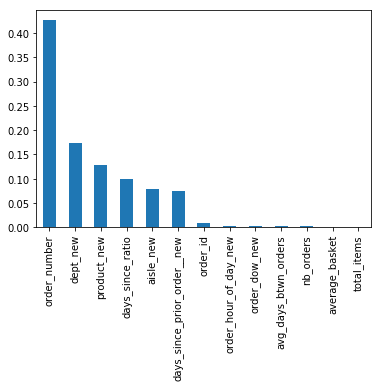

In [0]:
feature_imp_reorder = pd.Series(clfrf.feature_importances_,index= df.columns)
feature_imp_reorder.sort_values(ascending=False).plot(kind='Bar')

Looking at the feature importances for predicting whether a product will be reoredered or not, the most important features we observed are order_number, department, product, days since prior order and aisle

In [0]:
from sklearn.ensemble import AdaBoostClassifier

In [0]:
#AdaBoost Classifier buiding
clfa = AdaBoostClassifier( n_estimators=24,random_state=True)

In [0]:
#fitting
clfa.fit(Xtrain, ytrain)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=24, random_state=True)

In [0]:
train = clfa.predict(Xtrain)

In [0]:
#Metrics for the random forest model
print(accuracy_score(train,ytrain))
print(precision_score(train, ytrain))
print(recall_score(train,ytrain))
print(roc_auc_score(testrf, ytest))


0.597659381509671
0.8563689046935303
0.6183511565154185
0.6513959539698094


In [0]:
#testing
testada = clfa.predict(Xtest)

In [0]:
#Metrics for AdaBoost Classifier

print(accuracy_score(testada, ytest))
print(precision_score(testada, ytest))
print(recall_score(testada, ytest))
print(roc_auc_score(testada, ytest))

0.6565339226647022
0.8013028530068158
0.6812019280073839
0.6394996746893727


In [0]:
from sklearn.ensemble import GradientBoostingClassifier

In [0]:
clfg= GradientBoostingClassifier(max_features="log2", max_depth=11, n_estimators=24,min_samples_split=1000)

In [0]:
#fitting
clfg.fit(Xtrain, ytrain)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=11,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=24,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
traing = clfg.predict(Xtrain)

In [0]:
#Metrics for Gradient Boosting Model on training Data

print(accuracy_score(traing,ytrain))
print(precision_score(traing,ytrain))
print(recall_score(traing,ytrain))
print(roc_auc_score(traing,ytrain))

0.6762103151880202
0.8299338606782167
0.6911397819827113
0.6645978048103285


In [0]:
testg = clfg.predict(Xtest)

In [0]:
#Metrics for Gradient Boosting Model on Test Data

print(accuracy_score(testg, ytest))
print(precision_score(testg, ytest))
print(recall_score(testg, ytest))
print(roc_auc_score(testg, ytest))

0.67056665366671
0.8260007640187386
0.6870378112614345
0.65764850932828


In [0]:
#for predicting department variable

In [0]:
df_new.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department
0,1,49302,1,1,112108,train,4,4,10,9.0,Bulgarian Yogurt,120,16,dairy eggs
1,1,11109,2,1,112108,train,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,dairy eggs
2,1,10246,3,0,112108,train,4,4,10,9.0,Organic Celery Hearts,83,4,produce
3,1,49683,4,0,112108,train,4,4,10,9.0,Cucumber Kirby,83,4,produce
4,1,43633,5,1,112108,train,4,4,10,9.0,Lightly Smoked Sardines in Olive Oil,95,15,canned goods


In [0]:
# creating new features such as orders,reorders and reorder_rate for predicting the department variable

df_new['orders'] = df_new.groupby(df_new.product_id).size().astype(np.int32) 
df_new['orders'] = df_new['orders'].replace(np.nan,0)
df_new['reorders'] = df_new['reordered'].groupby(df_new.product_id).sum().astype(np.float32)
df_new['reorders'] = df_new['reorders'].replace(np.nan,0)
df_new['reorder_rate'] = (df_new.reorders / df_new.orders).astype(np.float32)
df_new['reorder_rate'] = df_new['reorder_rate'].replace(np.nan,0)

In [0]:
df_new['average_days_between_orders'] = orders.groupby('user_id')['days_since_prior_order'].mean().astype(np.float32)
df_new['average_days_between_orders'] = df_new['average_days_between_orders'].replace(np.nan, 0)

In [0]:
df_new['average_days_between_orders'] = df_new['average_days_between_orders'].replace(0, 1)

In [0]:
df_new['nb_orders'] = orders.groupby('user_id').size().astype(np.int16)
df_new['nb_orders'] = df_new['nb_orders'].replace(np.nan, 0)

In [0]:
df_new['total_items'] = df_merged1.groupby('user_id').size().astype(np.int16)
df_new['total_items'] = df_new['total_items'].replace(np.nan, 0)

In [0]:
df_new['average_basket'] = (df_new.total_items /df_new.nb_orders).astype(np.float32)

In [0]:
df_new.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department,orders,reorders,reorder_rate,average_days_between_orders,nb_orders,total_items,average_basket
0,1,49302,1,1,112108,train,4,4,10,9.0,Bulgarian Yogurt,120,16,dairy eggs,0.0,0.0,0.000000,1.000000,0.0,0.0,NaN
1,1,11109,2,1,112108,train,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,dairy eggs,76.0,49.0,0.644737,19.000000,10.0,11.0,1.100000
2,1,10246,3,0,112108,train,4,4,10,9.0,Organic Celery Hearts,83,4,produce,4.0,1.0,0.250000,16.285715,14.0,31.0,2.214286
3,1,49683,4,0,112108,train,4,4,10,9.0,Cucumber Kirby,83,4,produce,6.0,6.0,1.000000,12.000000,12.0,0.0,0.000000
4,1,43633,5,1,112108,train,4,4,10,9.0,Lightly Smoked Sardines in Olive Oil,95,15,canned goods,22.0,14.0,0.636364,17.000000,5.0,0.0,0.000000


In [0]:
df_new['average_basket'] = df_new['average_basket'].replace(np.nan, 0)
df_new['days_since_ratio'] = df_new.days_since_prior_order / df_new.average_days_between_orders
df_new['order_hour_of_day_new'] = [float(hour[t]) for t in df_new.order_hour_of_day]
df_new['reordered'] = df_new['reordered'].astype('float')
df_new['order_dow_new'] = [float(dow[t]) for t in df_new.order_dow]
df_new['days_since_prior_order__new'] = [float(dspo[t]) for t in df_new.days_since_prior_order]
df_new['dept_new'] = [float(dept[t]) for t in df_new.department_id]
df_new['product_new'] = [float(product[t]) for t in df_new.product_id]

In [0]:

del df_new['days_since_prior_order']
del df_new['order_dow']
del df_new['order_hour_of_day']
del df_new['department_id']
del df_new['aisle_id']
del df_new['product_id']
del df_new['add_to_cart_order']
del df_new['eval_set']
del df_new['department']
del df_new['product_name']
del df_new['product_new']

In [0]:
df_new.head()

,order_id,reordered,user_id,order_number,orders,reorders,reorder_rate,average_days_between_orders,nb_orders,total_items,average_basket,days_since_ratio,order_hour_of_day_new,order_dow_new,days_since_prior_order__new,dept_new
0,1,1.0,112108,4,0.0,0.0,0.000000,1.000000,0.0,0.0,0.000000,9.000000,0.0,0.0,0.0,0.0
1,1,1.0,112108,4,76.0,49.0,0.644737,19.000000,10.0,11.0,1.100000,0.473684,0.0,0.0,0.0,0.0
2,1,0.0,112108,4,4.0,1.0,0.250000,16.285715,14.0,31.0,2.214286,0.552632,0.0,0.0,0.0,1.0
3,1,0.0,112108,4,6.0,6.0,1.000000,12.000000,12.0,0.0,0.000000,0.750000,0.0,0.0,0.0,1.0
4,1,1.0,112108,4,22.0,14.0,0.636364,17.000000,5.0,0.0,0.000000,0.529412,0.0,0.0,0.0,2.0


In [0]:
ynew = df_new['dept_new']
del df_new['dept_new']

In [0]:
#Splitting the data into train and test
Xtrainnew, Xtestnew, ytrainnew, ytestnew = train_test_split(df_new, ynew, test_size=0.30, random_state=5)

In [0]:
#Random Forest Classifier

clfrfnew = RandomForestClassifier(max_features="log2", max_depth=11, n_estimators=24,min_samples_split=1000, oob_score=True)

In [0]:
#Building model
clfrfnew.fit(Xtrainnew, ytrainnew)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=11, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=1000,
                       min_weight_fraction_leaf=0.0, n_estimators=24,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
trainnrf = clfrfnew.predict_proba(Xtrainnew)

In [0]:
#predictions and probabiliti
testnrf =clfrfnew.predict_proba(Xtestnew)

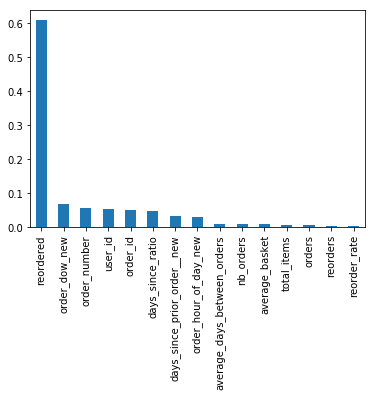

In [0]:
feature_imp_dept = pd.Series(clfrfnew.feature_importances_,index= df_new.columns)
feature_imp_dept.sort_values(ascending=False).plot(kind='Bar')

The most important features while predicting the department are: Reordered, day of week, order number, user_id and order_id.

In [0]:
# Log loss for the Random Forest model
from sklearn.metrics import log_loss
log_loss(ytestnew,testnrf)


2.343050686973105

In [0]:
log_loss(ytrainnew,trainnrf)

2.3340213166908335

In [0]:
#Gradient Boosting Classifier
clfgb= GradientBoostingClassifier(max_features="log2", max_depth=11, n_estimators=24,min_samples_split=1000)

In [0]:
#fitting
clfgb.fit(Xtrainnew,ytrainnew)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=11,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=1000,
                           min_weight_fraction_leaf=0.0, n_estimators=24,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
predgbterainn=clfgb.predict_proba(Xtrainnew)

In [0]:
#predictions and probabilties
predgbnewp =clfgb.predict_proba(Xtestnew)

In [0]:
#Log loss score for Gradient Boosting Classifier
log_loss( ytestnew,predgbnewp)


2.3421391402314993

In [0]:
log_loss(ytrainnew,predgbterainn)

2.28770107456173

In [0]:
clfada = AdaBoostClassifier( n_estimators=24,random_state=True)

In [0]:
predadatrain=clfada.fit(Xtrainnew, ytrainnew)

In [0]:
predaptr=clfada.predict_proba(Xtrainnew)

In [0]:
#predictions and probabilities
predadap = clfada.predict_proba(Xtestnew)

In [0]:
log_loss(ytestnew,predadap)

2.979625315097

In [0]:
log_loss( ytrainnew,predaptr)

2.9795467406613367

The best model for predicting whether a product will be reorodered or not is the Gradient Boosting Classifier with 0.67 accuracy. Whereas while predicting the category of the department, Random Forest Classifier is the best model with a log loss score of 2.342.